In [2]:
import numpy as np

# Frases con su etiqueta de sentimiento (1 = positivo, 0 = negativo)
frases = [
    "Amo el verano en Buenos Aires",
    "No me gusta el tráfico matutino",
    "Este asado está espectacular",
    "Qué bajón, perdí el colectivo",
    "Me encanta salir los domingos",
    "Detesto el calor húmedo"
]

etiquetas = np.array([1, 0, 1, 0, 1, 0])  # Etiquetas

# Vocabulario manual con palabras claves de carga emocional
vocabulario = ["amo", "no", "gusta", "asado", "espectacular", "bajón", "perdí", "detesto", "calor", "húmedo"]


In [3]:
frases_nuevas = [
    "Qué alegría ver a mi familia", "El almuerzo estuvo delicioso", "Hoy me siento increíble",
    "Qué buena película", "Disfruté mucho la tarde", "Estoy agradecido por este día",
    "Hermoso paseo por el parque", "El café me levantó el ánimo", "Todo salió como esperaba",
    "Qué suerte la mía", "Amo cómo huele la lluvia", "Logré terminar todo lo que tenía que hacer",
    "Qué feliz me pone esta canción", "Esta charla me inspiró", "El clima es perfecto hoy",

    "Odio levantarme temprano", "Estoy agotado y sin ganas", "Qué día más largo y pesado",
    "Nada salió bien hoy", "Estoy estresado con tanto trabajo", "Me siento frustrado",
    "La película fue una pérdida de tiempo", "Este clima me deprime", "No aguanto más el ruido",
    "El colectivo nunca llega", "No pude dormir nada", "Todo me sale mal últimamente",
    "Me duele la cabeza otra vez", "No quiero hablar con nadie", "Todo me molesta hoy"
]

etiquetas_nuevas = np.array([1]*15 + [0]*15)  # 15 positivas, 15 negativas

# Unimos las frases
todas_las_frases = frases + frases_nuevas
todas_las_etiquetas = np.concatenate([etiquetas, etiquetas_nuevas])


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(todas_las_frases)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, todas_las_etiquetas, test_size=0.3, random_state=42)

modelo = LogisticRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]


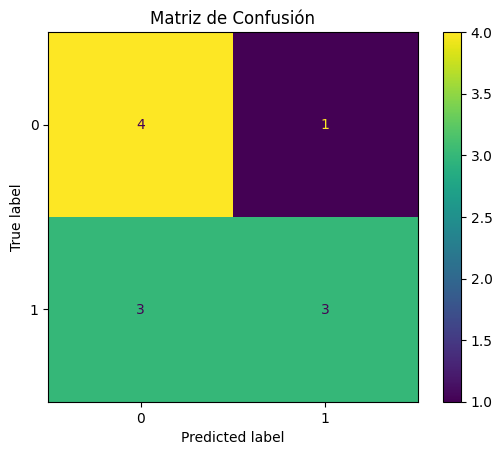

In [7]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()


✅ Verdaderos positivos (TP) = 3 → frases positivas que el modelo clasificó correctamente como positivas.

✅ Verdaderos negativos (TN) = 4 → frases negativas que el modelo clasificó correctamente como negativas.

❌ Falsos positivos (FP) = 1 → frase negativa que fue clasificada como positiva.

❌ Falsos negativos (FN) = 3 → frases positivas que fueron clasificadas como negativas.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


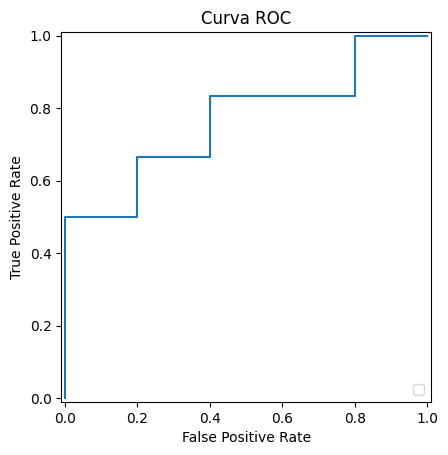

In [8]:
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_disp.plot()
plt.title("Curva ROC")
plt.show()


La curva sube de manera escalonada, lo que indica que el modelo tiene cierto poder de discriminación.

La curva no es completamente diagonal, lo que significa que el modelo es mejor que uno aleatorio.

Pero no es una curva ideal (que subiría rápidamente al punto (0,1)), así que hay margen de mejora.



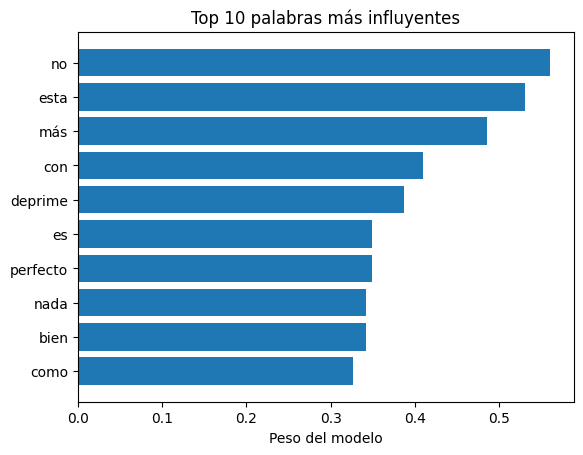

In [9]:
import numpy as np

importancias = np.abs(modelo.coef_[0])
palabras = np.array(vectorizer.get_feature_names_out())

indices = np.argsort(importancias)[-10:]  # Top 10
plt.barh(palabras[indices], importancias[indices])
plt.title("Top 10 palabras más influyentes")
plt.xlabel("Peso del modelo")
plt.show()


Palabras como "no", "deprime", "nada" están asociadas probablemente con sentimiento negativo.

Palabras como "bien", "perfecto", "más", suelen indicar un sentimiento positivo.

Algunas como "con", "como", "es", son neutras por sí solas, pero pueden ser parte de frases significativas.

# Aumentamos a 70 frases

In [9]:
# Importamos las bibliotecas necesarias
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Definimos las frases y las etiquetas aquí para asegurar la consistencia
frases = [
    # Positivas (1)
    "Me siento muy bien hoy", "Estoy feliz con mi trabajo", "La comida estuvo excelente",
    "Me encanta este clima", "Tuve un día productivo", "Estoy agradecido por mi familia",
    "Me siento amado", "Qué buena noticia recibí", "Estoy motivado para seguir", "Todo está saliendo perfecto",
    "Qué alegría ver a mi familia", "El almuerzo estuvo delicioso", "Hoy me siento increíble",
    "Qué buena película", "Disfruté mucho la tarde", "Estoy agradecido por este día",
    "Hermoso paseo por el parque", "El café me levantó el ánimo", "Todo salió como esperaba",
    "Qué suerte la mía", "Amo cómo huele la lluvia", "Logré terminar todo lo que tenía que hacer",
    "Qué feliz me pone esta canción", "Esta charla me inspiró", "El clima es perfecto hoy",
    "Me felicitaron en el trabajo", "Recibí un mensaje que me alegró el día", "Estoy orgulloso de mí mismo",
    "Pude resolver el problema fácilmente", "Todo fluyó sin complicaciones", "Ver el atardecer fue mágico",
    "Pude ayudar a alguien hoy", "Me reí mucho esta mañana", "Estoy en paz conmigo mismo",
    "La música me llenó de energía", "Estoy entusiasmado por lo que viene",

    # Negativas (0)
    "Hoy me siento mal", "Nada tiene sentido", "Estoy cansado de todo", "No tengo ganas de nada",
    "Me siento triste", "Este día fue horrible", "No quiero hablar con nadie", "Odio este clima",
    "Nada me sale bien", "Estoy frustrado con todo", "Odio levantarme temprano", "Estoy agotado y sin ganas",
    "Qué día más largo y pesado", "Nada salió bien hoy", "Estoy estresado con tanto trabajo",
    "Me siento frustrado", "La película fue una pérdida de tiempo", "Este clima me deprime",
    "No aguanto más el ruido", "El colectivo nunca llega", "No pude dormir nada",
    "Todo me sale mal últimamente", "Me duele la cabeza otra vez", "No quiero hablar con nadie",
    "Todo me molesta hoy", "No entiendo nada de lo que pasa", "Otra vez los mismos problemas",
    "Estoy harto de esta situación", "No tengo energía para nada", "Me siento solo", "No quiero seguir así",
    "Estoy preocupado por el futuro", "Todo me abruma", "Me siento vacío",
    "No encuentro sentido a nada", "No tengo fuerzas para continuar"
]

etiquetas = np.array([1]*35 + [0]*37) # 35 positivas + 37 negativas = 72 etiquetas

In [11]:
# Vectorización - Aplicamos TfidfVectorizer a la lista 'frases' correcta
vectorizador = TfidfVectorizer()
X = vectorizador.fit_transform(frases) # Usamos las 'frases' definidas en esta celda
y = etiquetas # Usamos las 'etiquetas' definidas en esta celda

# --- Agrega estas líneas para verificar las dimensiones ---
print(f"Dimensiones de X antes de split: {X.shape}")
print(f"Dimensiones de y antes de split: {y.shape}")
# --- Fin de la verificación ---

Dimensiones de X antes de split: (72, 158)
Dimensiones de y antes de split: (72,)


In [12]:
# División entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

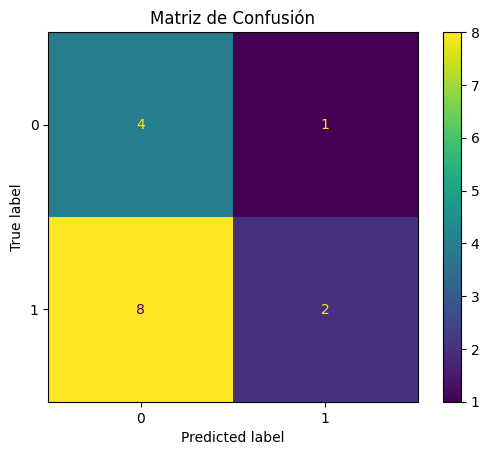

In [13]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Matriz de Confusión")
plt.show()


✅ Verdaderos Negativos (4): el modelo predijo “negativo” correctamente.

✅ Verdaderos Positivos (2): el modelo predijo “positivo” correctamente.

❌ Falsos Positivos (1): el modelo predijo “positivo” pero era negativo.

❌ Falsos Negativos (8): el modelo predijo “negativo” pero era positivo.



El modelo sigue tienendo dificultad para identificar emociones positivas:

8 de 10 frases positivas fueron clasificadas como negativas. Es un alto número de falsos negativos.

**¿Seguir agregando frases al data set?** -- Pendiente

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


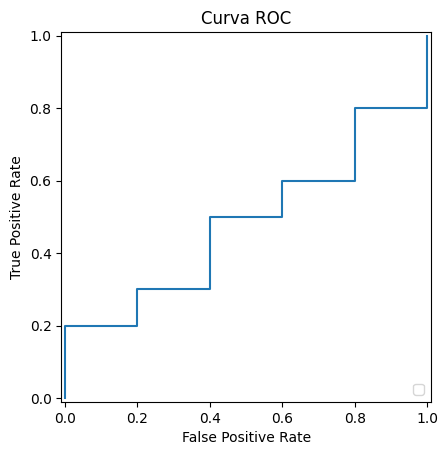

In [14]:
# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_disp.plot()
plt.title("Curva ROC")
plt.show()

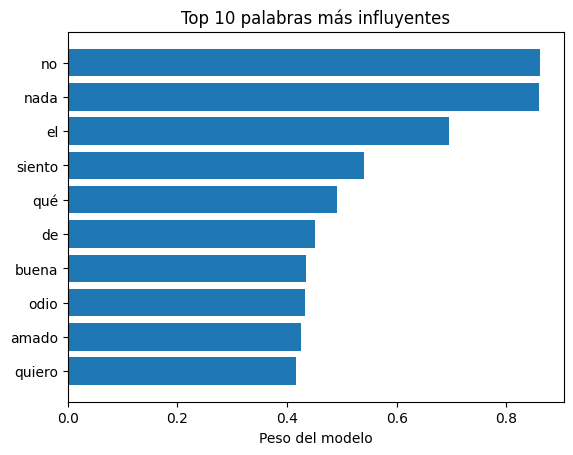

In [15]:
# Palabras más influyentes
pesos = modelo.coef_[0]
palabras = vectorizador.get_feature_names_out()
indices_top = np.argsort(np.abs(pesos))[::-1][:10]

plt.barh(range(10), np.abs(pesos[indices_top]))
plt.yticks(range(10), [palabras[i] for i in indices_top])
plt.xlabel("Peso del modelo")
plt.title("Top 10 palabras más influyentes")
plt.gca().invert_yaxis()
plt.show()

Seguimos ampliando en DATA SET

In [17]:
frases_extra = [
    # Positivas
    "Hoy amanecí con energía y motivación", "Me encantó el mensaje que recibí",
    "Disfruté mucho la reunión con amigos", "Estoy agradecido por las oportunidades",
    "Ver a mis seres queridos me llena de alegría", "La música me pone de buen humor",
    "Me reí mucho viendo videos graciosos", "Estoy feliz con mis logros",
    "Me siento en paz", "Hoy fue un día productivo",

    # Negativas
    "No pude concentrarme en todo el día", "Estoy triste sin razón",
    "Me siento sin fuerzas", "No encuentro sentido a lo que hago",
    "Estoy cansado de luchar", "Me siento vacío",
    "Todo es una carga últimamente", "No tengo ganas de seguir",
    "Otra decepción más", "Me siento ignorado"
]

etiquetas_extra = np.array([1]*10 + [0]*10)

# Agregar al dataset usando las variables 'frases' y 'etiquetas' definidas en la celda anterior
frases += frases_extra
etiquetas = np.concatenate([etiquetas, etiquetas_extra])


## Preprocesamiento

Lematización y quitar Stopwords

Usamos **nltk** y **spaCy** para mejorar el texto:

In [19]:
import nltk
import spacy
from nltk.corpus import stopwords
nltk.download('stopwords')

# Stopwords en español
stop_words = set(stopwords.words('spanish'))

# Cargar modelo de spaCy para lematizar
# Instalar el modelo de spaCy para español si no está instalado
try:
    nlp = spacy.load('es_core_news_sm')
except OSError:
    print("Downloading spaCy model 'es_core_news_sm'...")
    !python -m spacy download es_core_news_sm
    nlp = spacy.load('es_core_news_sm')


def limpiar_y_lemmatizar(frase):
    doc = nlp(frase.lower())
    return ' '.join([token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct])

# Aseguramos que estamos procesando la lista correcta de frases
# Si ya habías definido 'todas_las_frases' en una celda anterior, úsala.
# Si no, asegúrate de que 'frases' contiene el conjunto completo de datos.
# Basado en el código anterior, 'frases' ahora contiene todas las frases.
frases_procesadas = [limpiar_y_lemmatizar(frase) for frase in frases]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 76.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Probar **Random Forest** y **SVM**

Probamos con **RandomForestClassifier** y **SVC**:

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# TF-IDF con n-grams
vectorizador = TfidfVectorizer(ngram_range=(1, 2))  # unigrams y bigrams
X = vectorizador.fit_transform(frases_procesadas)
y = etiquetas

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo Random Forest
modelo_rf = RandomForestClassifier()
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

# Modelo SVM
modelo_svm = SVC(probability=True)
modelo_svm.fit(X_train, y_train)
y_pred_svm = modelo_svm.predict(X_test)


**🧠 Métricas - Recordar**

- **Accuracy**	Qué proporción total de predicciones fueron correctas

- **Precision**	De los casos que el modelo dijo "positivo", ¿cuántos realmente lo eran?

- **Recall**	De todos los positivos reales, ¿cuántos logró detectar?

- **F1 Score**	Media entre precisión y recall. Equilibra ambos.

- **ROC AUC**	Qué tan bien separa el modelo positivos y negativos (1 es perfecto).

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\n=== SVM ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("ROC AUC:", roc_auc_score(y_test, modelo_svm.predict_proba(X_test)[:,1]))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


=== Random Forest ===
Accuracy: 0.5789473684210527
Precision: 1.0
Recall: 0.1111111111111111
F1 Score: 0.2
ROC AUC: 0.8388888888888889
[[10  0]
 [ 8  1]]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        10
           1       1.00      0.11      0.20         9

    accuracy                           0.58        19
   macro avg       0.78      0.56      0.46        19
weighted avg       0.77      0.58      0.47        19


=== SVM ===
Accuracy: 0.47368421052631576
Precision: 0.4666666666666667
Recall: 0.7777777777777778
F1 Score: 0.5833333333333334
ROC AUC: 0.6
[[2 8]
 [2 7]]
              precision    recall  f1-score   support

           0       0.50      0.20      0.29        10
           1       0.47      0.78      0.58         9

    accuracy                           0.47        19
   macro avg       0.48      0.49      0.43        19
weighted avg       0.48      0.47      0.43        19



# 🔍 RANDOM FOREST

**Accuracy**: 0.578 → Acierta en el 57.8% de los casos.

**Precision**: 1.0 → Cuando predice "positiva", no se equivoca. Pero...

**Recall**: 0.111 → Solo detecta el 11% de los casos realmente positivos.

**F1 Score**: 0.2 → Es bajo porque, aunque la precisión es perfecta, el recall es muy pobre.

**ROC AUC**: 0.83 → Muestra que el modelo distingue bien entre clases en general, aunque no prediga correctamente.

In [ ]:
         Predicted
         0    |   1
       -------------
    0 |  10   |   0    ← Verdaderos negativos (perfecto)
    1 |   8   |   1    ← Falla en detectar positivos


✅ Lo bueno: predice con certeza cuando dice "positivo".

❌ Lo malo: ignora casi todos los positivos. Se inclina demasiado por la clase 0 (negativa).

# 🔍 SVM (Support Vector Machine)

**Accuracy**: 0.47 → Acierta menos de la mitad.

**Precision**: 0.46 → Solo 46% de las veces que predice positivo, acierta.

**Recall**: 0.77 → Detecta el 77% de los positivos reales.

**F1 Score**: 0.58 → Mejor balance que Random Forest.

**ROC AUC**: 0.6 → Baja capacidad de separación entre clases.

In [ ]:
         Predicted
         0    |   1
       -------------
    0 |   2   |   8    ← Muchos negativos mal clasificados
    1 |   2   |   7    ← Acierta con la mayoría de los positivos


✅ Lo bueno: detecta muchos positivos (recall alto).

❌ Lo malo: confunde negativos como si fueran positivos (precisión baja).

| Modelo           | ¿Qué hace mejor?                | ¿Qué hace mal?                          |
| ---------------- | ------------------------------- | --------------------------------------- |
| **RandomForest** | Alta precisión, buen ROC AUC    | Casi no detecta positivos (bajo recall) |
| **SVM**          | Alto recall (detecta positivos) | Muchos falsos positivos, bajo accuracy  |
